In [75]:
# !gdown --id '1ysAKkeJoSCYQ-b152N1VY3XOnOFBJXB0' --output Cerebral_Stroke_Prediction.csv
# !gdown --id '1pawXE02q9oobfFdjMbOmWakLAUh4T-Rh' --output stroke.csv

#**Import**


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("./Cerebral_Stroke_Prediction.csv")
# df = pd.read_csv('./stroke.csv')

In [78]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Analysis**


## Data detail


In [79]:
# Checking for missing values
missing_data = df.isnull().sum()

# Calculating descriptive statistics
descriptive_stats = df.describe()

missing_data, descriptive_stats

(id                     0
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64,
                  id          age  hypertension  heart_disease  \
 count   5110.000000  5110.000000   5110.000000    5110.000000   
 mean   36517.829354    43.226614      0.097456       0.054012   
 std    21161.721625    22.612647      0.296607       0.226063   
 min       67.000000     0.080000      0.000000       0.000000   
 25%    17741.250000    25.000000      0.000000       0.000000   
 50%    36932.000000    45.000000      0.000000       0.000000   
 75%    54682.000000    61.000000      0.000000       0.000000   
 max    72940.000000    82.000000      1.000000       1.000000   
 
        avg_glucose_level          bmi       stroke  
 count        5110.0000

## Imbalanced dataset


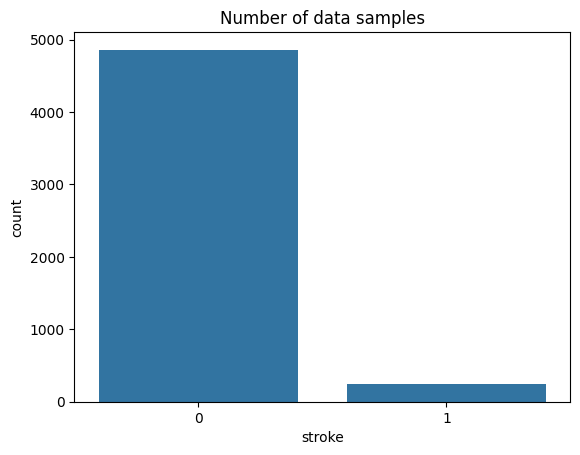

In [80]:
sns.countplot(x='stroke', data=df)
plt.title("Number of data samples")
plt.show()

# 42617:783

# **Data Clean**


## LabelEncoding && One-hot encoding


In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# converting the gender into 0,1 and 2.
df['gender'] = le.fit_transform(df['gender'])

# converting the Residence_type into 0 and 1.
df['Residence_type'] = le.fit_transform(df['Residence_type'])

# converting the ever_married into 0 and 1.
df['ever_married'] = le.fit_transform(df['ever_married'])

stroke_column = df['stroke']
df = df.drop('stroke', axis=1)

# one-hot encoding
df = pd.get_dummies(df, columns=['smoking_status'])
df = pd.get_dummies(df, columns=['work_type'])

df['stroke'] = stroke_column

## Imputation


In [82]:
# fill null value
df['bmi'].fillna(df['bmi'].median(), inplace=True)
missing_data = df.isnull().sum()

## Normalization


In [83]:
from sklearn.preprocessing import MinMaxScaler

# Normalization
features_to_normalize = ["avg_glucose_level", "bmi", "age"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [84]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,9046,1,0.816895,0,1,1,1,0.801265,0.301260,0,1,0,0,0,0,1,0,0,1
1,51676,0,0.743652,0,0,1,0,0.679023,0.203895,0,0,1,0,0,0,0,1,0,1
2,31112,1,0.975586,0,1,1,0,0.234512,0.254296,0,0,1,0,0,0,1,0,0,1
3,60182,0,0.597168,0,0,1,1,0.536008,0.276060,0,0,0,1,0,0,1,0,0,1
4,1665,0,0.963379,1,0,1,0,0.549349,0.156930,0,0,1,0,0,0,0,1,0,1


## Feature selection


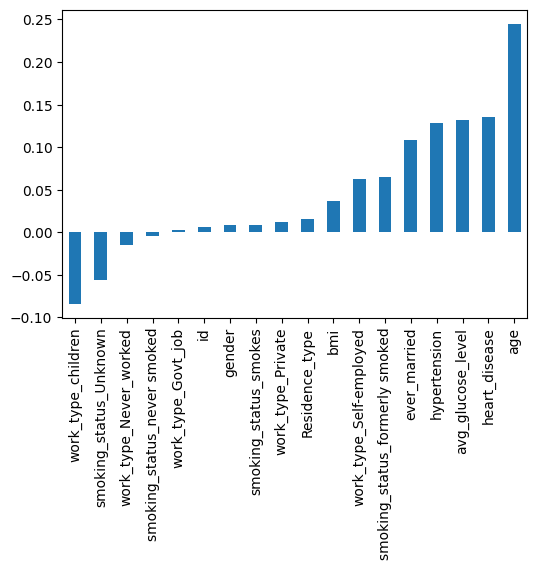

In [85]:
df_numerical = pd.get_dummies(df, drop_first=True)

correlation_all = df_numerical.corr()

stroke_correlation_all = correlation_all['stroke'].sort_values()

plt.figure(figsize=(6, 4))
stroke_correlation_all.drop('stroke').plot(kind='bar')
plt.show()

# remove unuseful data
df = df.drop(['work_type_children'], axis=1)
df = df.drop(['work_type_Never_worked'], axis=1)
df = df.drop(['work_type_Govt_job'], axis=1)
df = df.drop(['work_type_Private'], axis=1)
df = df.drop(['smoking_status_never smoked'], axis=1)
df = df.drop(['Residence_type'], axis=1)
df = df.drop(['id'], axis=1)

# **Splitting**


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

x = df.drop('stroke', axis=1)
y = df['stroke']

X_train_original, X_test, Y_train_original, Y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)
print(len(X_train_original), len(X_test))
print(sum(Y_train_original == 1), sum(Y_train_original == 0))


# 交叉驗證
# sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# for train_index, test_index in sss.split(x, y):
#     print("Train:", train_index, "Test:", test_index)
#     X_train, X_test = x.iloc[train_index], x.iloc[test_index]
#     Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

# X_train = X_train.values
# X_test = X_test.values
# Y_train = Y_train.values
# Y_test = Y_test.values

# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(Y_train, return_counts=True)
# test_unique_label, test_counts_label = np.unique(Y_test, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(Y_train))
# print(test_counts_label/ len(Y_test))

4088 1022
187 3901


# **PCA**


In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def drawPCA(X_train, Y_train, title):
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='plasma', edgecolor='k', s=20)
    plt.title(title)
    plt.colorbar()
    plt.show()

# **Methods**


## Classifiers


In [88]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifiers = {
    'Logistic Regression': linear_model.LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

## Sampling


In [89]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import (
    RandomUnderSampler,
    TomekLinks,
    EditedNearestNeighbours,
)

resampling_methods = {
    "Original": None,
    "SMOTE": SMOTE(),
    "ADASYN": ADASYN(),
    "RUS": RandomUnderSampler(),
    "SMOTE + TOMEK": SMOTETomek(),
    "ADASYN + TOMEK": None,
    "SMOTE + ENN": SMOTEENN(),
    "ADASYN + ENN": None,
}

## Evaluate && Predict


In [90]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score


def evaluate_model(classifier, X_train, Y_train, X_test, Y_test, method_name="Method", classifier_name="Classifier"):
    print(f"正在處理 {method_name} + {classifier_name} 組合...")

    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    roc_auc = roc_auc_score(Y_test, Y_pred)

    recall = recall_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)

    metrics = {
        'Method': method_name,
        'Classifier': classifier_name,
        'Recall': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1-Score': f1,
        'G-mean': g_mean,
        'AUC-ROC': roc_auc
    }

    return metrics

In [91]:
results = []
for method_name, method in resampling_methods.items():
    print(f"採樣方法: {method_name}")
    result = []

    X_train = X_train_original.copy()
    Y_train = Y_train_original.copy()

    if method_name == 'ADASYN + TOMEK':
        resampler = ADASYN()
        X_resampled, Y_resampled = resampler.fit_resample(X_train, Y_train)
        cleaner = TomekLinks()
        X_resampled, Y_resampled = cleaner.fit_resample(
            X_resampled, Y_resampled)
    elif method_name == 'ADASYN + ENN':
        resampler = ADASYN()
        X_resampled, Y_resampled = resampler.fit_resample(X_train, Y_train)
        cleaner = EditedNearestNeighbours()
        X_resampled, Y_resampled = cleaner.fit_resample(
            X_resampled, Y_resampled)
    elif method is not None:
        X_resampled, Y_resampled = method.fit_resample(X_train, Y_train)
    else:
        X_resampled, Y_resampled = X_train, Y_train

    # 計算重採樣後的正負樣本數量
    positive_count_resampled = sum(Y_resampled == 1)
    negative_count_resampled = sum(Y_resampled == 0)
    print(positive_count_resampled, negative_count_resampled)

    # Split the data for testing
    X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(
        X_resampled, Y_resampled, test_size=0.3, random_state=1)

    for classifier_name, classifier in classifiers.items():
        metrics = evaluate_model(classifier, X_train_resampled, Y_train_resampled,
                                 X_test_resampled, Y_test_resampled, method_name, classifier_name)
        result.append(metrics)
        results.append(metrics)

    result_df = pd.DataFrame(result)

採樣方法: Original
187 3901
正在處理 Original + Logistic Regression 組合...
正在處理 Original + KNearest 組合...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


正在處理 Original + Random Forest 組合...
採樣方法: SMOTE
3901 3901
正在處理 SMOTE + Logistic Regression 組合...
正在處理 SMOTE + KNearest 組合...
正在處理 SMOTE + Random Forest 組合...
採樣方法: ADASYN
3906 3901
正在處理 ADASYN + Logistic Regression 組合...
正在處理 ADASYN + KNearest 組合...
正在處理 ADASYN + Random Forest 組合...
採樣方法: RUS
187 187
正在處理 RUS + Logistic Regression 組合...
正在處理 RUS + KNearest 組合...
正在處理 RUS + Random Forest 組合...
採樣方法: SMOTE + TOMEK
3827 3827
正在處理 SMOTE + TOMEK + Logistic Regression 組合...
正在處理 SMOTE + TOMEK + KNearest 組合...
正在處理 SMOTE + TOMEK + Random Forest 組合...
採樣方法: ADASYN + TOMEK
3798 3901
正在處理 ADASYN + TOMEK + Logistic Regression 組合...
正在處理 ADASYN + TOMEK + KNearest 組合...
正在處理 ADASYN + TOMEK + Random Forest 組合...
採樣方法: SMOTE + ENN
3427 3049
正在處理 SMOTE + ENN + Logistic Regression 組合...
正在處理 SMOTE + ENN + KNearest 組合...
正在處理 SMOTE + ENN + Random Forest 組合...
採樣方法: ADASYN + ENN
3395 3901
正在處理 ADASYN + ENN + Logistic Regression 組合...
正在處理 ADASYN + ENN + KNearest 組合...
正在處理 ADASYN + ENN + Random Forest 組合

In [92]:
results_df = pd.DataFrame(results)

results_df

,Method,Classifier,Recall,Specificity,Precision,F1-Score,G-mean,AUC-ROC
0,Original,Logistic Regression,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000
1,Original,KNearest,0.038462,0.994043,0.222222,0.065574,0.195531,0.516252
2,Original,Random Forest,0.000000,0.998298,0.000000,0.000000,0.000000,0.499149
3,SMOTE,Logistic Regression,0.843087,0.752151,0.775351,0.807802,0.796322,0.797619
4,SMOTE,KNearest,0.960136,0.799484,0.829304,0.889937,0.876135,0.879810
5,SMOTE,Random Forest,0.966073,0.888124,0.897557,0.930556,0.926279,0.927098
6,ADASYN,Logistic Regression,0.812709,0.739320,0.764752,0.788002,0.775146,0.776014
7,ADASYN,KNearest,0.967391,0.778553,0.819986,0.887610,0.867851,0.872972
8,ADASYN,Random Forest,0.952341,0.879686,0.891934,0.921148,0.915293,0.916014
9,RUS,Logistic Regression,0.758621,0.709091,0.733333,0.745763,0.733438,0.733856


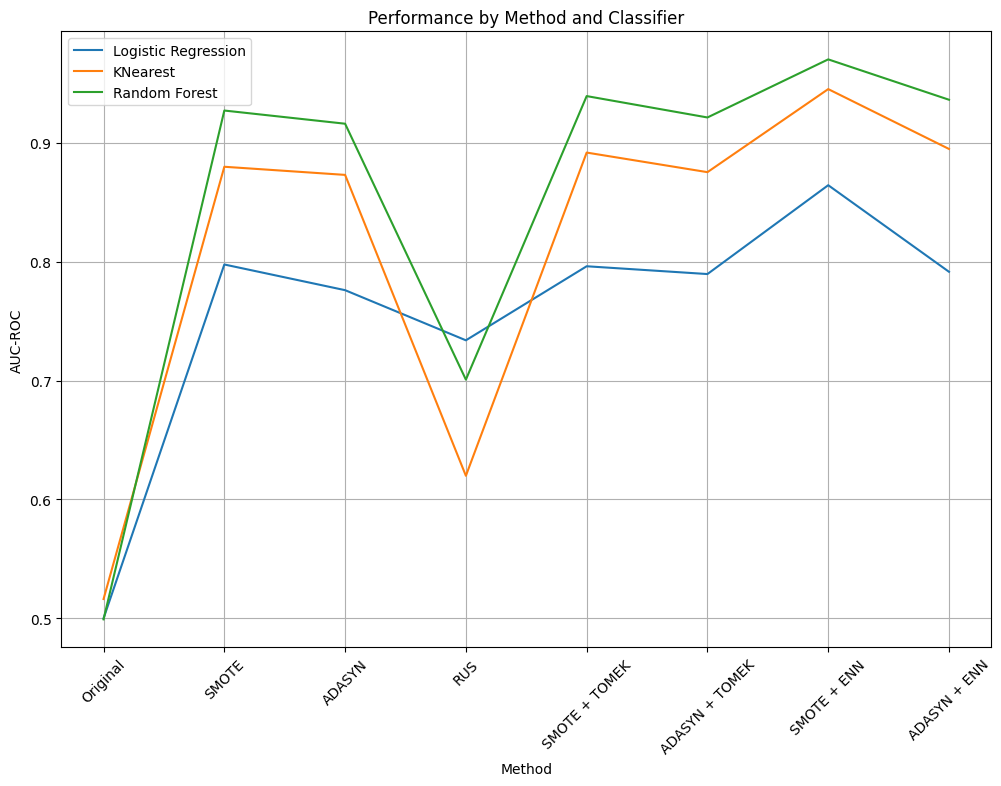

In [93]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 8))
for classifier in results_df["Classifier"].unique():
    subset = results_df[results_df["Classifier"] == classifier]
    plt.plot(subset["Method"], subset["AUC-ROC"], label=classifier)

plt.xlabel("Method")
plt.ylabel("AUC-ROC")
plt.title("Performance by Method and Classifier")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()